#**Deep Learning in Python Project: Data Augmentation**

# Libraries

In [ ]:
#pip install tensorflow_addons (install if needed)
import os
import cv2
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Opening and Displaying Images

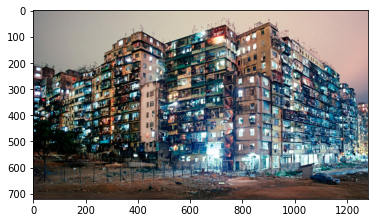

In [ ]:
img_path = "drive/MyDrive/DLIP/Images/city.jpg"

my_img = tf.io.read_file(img_path)
tensor = tf.io.decode_image(my_img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

# Gaussian Blur


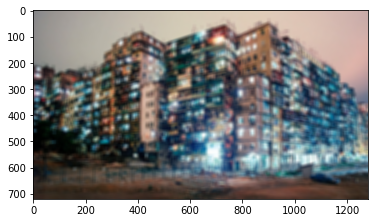

In [ ]:
my_img = tf.io.read_file(img_path)
tensor = tf.io.decode_image(my_img, channels=3, dtype=tf.dtypes.float32)
img_blur = tfa.image.gaussian_filter2d(tensor, filter_shape = (15,15), sigma = 30.5)
plt.imshow(img_blur)

# Gaussian Noise


In [ ]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
    elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
    elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
    elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy

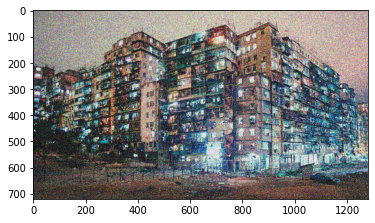

In [ ]:
my_img = tf.io.read_file(img_path)
tensor = tf.io.decode_image(my_img, channels=3, dtype=tf.dtypes.float32)
img_noise = noisy("gauss", tensor)
plt.imshow(img_noise)

# Exposure

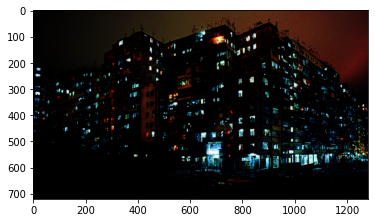

In [ ]:
# Underexposed Image
my_img = tf.io.read_file(img_path)
tensor = tf.io.decode_image(my_img, channels=3, dtype=tf.dtypes.float32)
img_under = tf.image.adjust_gamma(tensor, gamma = 8)
plt.imshow(img_under)

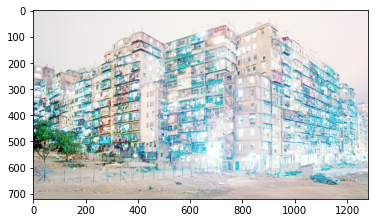

In [ ]:
# Overexposed Image
my_img = tf.io.read_file(img_path)
tensor = tf.io.decode_image(my_img, channels=3, dtype=tf.dtypes.float32)
img_over = tf.image.adjust_gamma(tensor, gamma = 0.2)
plt.imshow(img_over)

# Motion Blur

### Horizontal

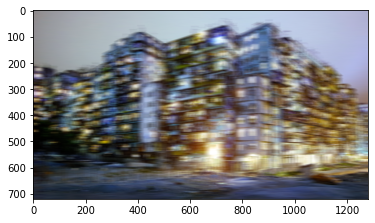

In [ ]:
img = cv2.imread(img_path)
  
# Specify the kernel size.
# The greater the size, the more the motion.
kernel_size = 30
  
# Create the horizontal kernel.
kernel_h = np.copy(kernel_v)
  
# Fill the middle row with ones.
kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size)
  
# Normalize.
kernel_h /= kernel_size
    
# Apply the horizontal kernel.
img_hmb = cv2.filter2D(img, -1, kernel_h)

plt.imshow(img_hmb)

### Vertical

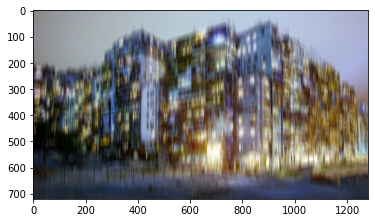

In [ ]:
img = cv2.imread(img_path)

# Specify the kernel size.
# The greater the size, the more the motion.
kernel_size = 30
  
# Create the vertical kernel.
kernel_v = np.zeros((kernel_size, kernel_size))
  
# Fill the middle row with ones.
kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)
  
# Normalize.
kernel_v /= kernel_size
  
# Apply the vertical kernel.
img_vmb = cv2.filter2D(img, -1, kernel_v)

plt.imshow(img_vmb)

# JPEG Compression

